In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['font.size'] = 5

from scipy import stats

from collections import Counter

from adjustText import adjust_text

In [26]:
from Bio.KEGG import REST

from io import StringIO

In [89]:
genes = REST.kegg_find("genes", "rpoB").read()
genes = pd.read_csv(StringIO(genes), sep='\t', names=['id', 'name'])

genes['kegg_id'] = genes.id.str.split(':').str[0]

In [55]:
org = REST.kegg_list("organism").read()
org = pd.read_csv(StringIO(org), sep='\t', names=['T_id', 'kegg_id', 'species', 'class'])

In [100]:
combined = genes.merge(org, on='kegg_id')

In [114]:
combined[combined.species.str.contains('coli')]

,id,name,kegg_id,T_id,species,class
97,eco:b3987,rpoB; RNA polymerase subunit beta,eco,T00007,Escherichia coli K-12 MG1655,Prokaryotes;Bacteria;Gammaproteobacteria - Ent...
98,ecj:JW3950,"rpoB; RNA polymerase, beta subunit",ecj,T00068,Escherichia coli K-12 W3110,Prokaryotes;Bacteria;Gammaproteobacteria - Ent...
99,ecd:ECDH10B_4175,"rpoB; RNA polymerase, beta subunit",ecd,T00666,Escherichia coli K-12 DH10B,Prokaryotes;Bacteria;Gammaproteobacteria - Ent...
100,ebw:BWG_3646,"rpoB; RNA polymerase, beta subunit",ebw,T00913,Escherichia coli K-12 BW2952,Prokaryotes;Bacteria;Gammaproteobacteria - Ent...
101,ecok:ECMDS42_3424,"rpoB; RNA polymerase, beta subunit",ecok,T02541,Escherichia coli K-12 MDS42,Prokaryotes;Bacteria;Gammaproteobacteria - Ent...
...,...,...,...,...,...,...
3154,mjd:JDM601_0682,rpoB; DNA-directed RNA polymerase beta subunit...,mjd,T01512,Mycolicibacter sinensis,Prokaryotes;Bacteria;Actinobacteria;Mycoliciba...
3155,mter:4434518_00668,rpoB; DNA-directed RNA polymerase subunit beta,mter,T05465,Mycolicibacter terrae,Prokaryotes;Bacteria;Actinobacteria;Mycoliciba...
3156,mmin:MMIN_23450,rpoB; DNA-directed RNA polymerase subunit beta,mmin,T06638,Mycolicibacter minnesotensis,Prokaryotes;Bacteria;Actinobacteria;Mycoliciba...
3157,mhib:MHIB_01920,rpoB; DNA-directed RNA polymerase subunit beta,mhib,T06801,Mycolicibacter hiberniae,Prokaryotes;Bacteria;Actinobacteria;Mycoliciba...


In [115]:
aas = []

g = combined

import time

for i in range(0, len(g), 10):
    print(i)
    top_lim = min(i+10, len(g))
    
    query = REST.kegg_get(list(g.id[i: top_lim]), "aaseq").read()
    
    for sa in query.split('>'):
        if len(sa) > 0:
            sas = sa.split('\n')
            aas.append([sas[0], "".join(sas[1:])])
            
    time.sleep(.001)


0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
2

In [127]:
df = pd.DataFrame(aas, columns=['meta', 'aaseq'])
df['id'] = df.meta.str.split().str[0]
df = df.merge(combined, on='id')

In [ ]:
cs = df['class'].str.split(';')
df['domain'] = cs.str[0]
df['phylum'] = cs.str[1]
df['class'] = cs.str[2]
df['family'] = cs.str[3]

In [147]:
#downloaded 9/22/2021
df.to_csv('kegg_orthos.csv', index=False)

In [2]:
df = pd.read_csv('kegg_orthos.csv')
pdf = df[(df.domain == 'Prokaryotes') & (df.phylum == 'Bacteria')]

In [157]:
pdf

,meta,aaseq,id,name,kegg_id,T_id,species,class,domain,phylum,family
97,eco:b3987 K03043 DNA-directed RNA polymerase s...,MVYSYTEKKRIRKDFGKRPQVLDVPYLLSIQLDSFQKFIEQDPEGQ...,eco:b3987,rpoB; RNA polymerase subunit beta,eco,T00007,Escherichia coli K-12 MG1655,Gammaproteobacteria - Enterobacteria,Prokaryotes,Bacteria,Escherichia
98,ecj:JW3950 K03043 DNA-directed RNA polymerase ...,MVYSYTEKKRIRKDFGKRPQVLDVPYLLSIQLDSFQKFIEQDPEGQ...,ecj:JW3950,"rpoB; RNA polymerase, beta subunit",ecj,T00068,Escherichia coli K-12 W3110,Gammaproteobacteria - Enterobacteria,Prokaryotes,Bacteria,Escherichia
99,ecd:ECDH10B_4175 K03043 DNA-directed RNA polym...,MVYSYTEKKRIRKDFGKRPQVLDVPYLLSIQLDSFQKFIEQDPEGQ...,ecd:ECDH10B_4175,"rpoB; RNA polymerase, beta subunit",ecd,T00666,Escherichia coli K-12 DH10B,Gammaproteobacteria - Enterobacteria,Prokaryotes,Bacteria,Escherichia
100,ebw:BWG_3646 K03043 DNA-directed RNA polymeras...,MVYSYTEKKRIRKDFGKRPQVLDVPYLLSIQLDSFQKFIEQDPEGQ...,ebw:BWG_3646,"rpoB; RNA polymerase, beta subunit",ebw,T00913,Escherichia coli K-12 BW2952,Gammaproteobacteria - Enterobacteria,Prokaryotes,Bacteria,Escherichia
101,ecok:ECMDS42_3424 K03043 DNA-directed RNA poly...,MVYSYTEKKRIRKDFGKRPQVLDVPYLLSIQLDSFQKFIEQDPEGQ...,ecok:ECMDS42_3424,"rpoB; RNA polymerase, beta subunit",ecok,T02541,Escherichia coli K-12 MDS42,Gammaproteobacteria - Enterobacteria,Prokaryotes,Bacteria,Escherichia
...,...,...,...,...,...,...,...,...,...,...,...
4147,tmg:US01_C0001G0199 K03043 DNA-directed RNA po...,MPQKARRQNWGQKHQILPILDLIQLQSESYKDFLENGIAVALKEVN...,tmg:US01_C0001G0199,rpoB; DNA-directed RNA polymerase subunit beta,tmg,T04457,Candidate division TM6 bacterium GW2011_GWF2_2...,Bacteria incertae sedis,Prokaryotes,Bacteria,Bacteria candidate phyla
4148,bgw:VE98_C0001G0335 K03043 DNA-directed RNA po...,MSKKALEPHILITENERYQDKWYADPKKVHPLPELNSLQRRSYDHF...,bgw:VE98_C0001G0335,rpoB; DNA-directed RNA polymerase subunit beta...,bgw,T03988,Candidate division Kazan bacterium GW2011_GWA1...,Bacteria incertae sedis,Prokaryotes,Bacteria,Bacteria candidate phyla
4149,bbgw:UT28_C0001G0898 K03043 DNA-directed RNA p...,MSTQNRLQFSKPKFTVPLPNLIEVQTQSYDWFFKEGIRELLDEISP...,bbgw:UT28_C0001G0898,rpoB; DNA-directed RNA polymerase subunit beta...,bbgw,T03992,Berkelbacteria bacterium GW2011_GWE1_39_12,Bacteria incertae sedis,Prokaryotes,Bacteria,Bacteria candidate phyla
4150,pwo:UX70_C0001G0567 K03043 DNA-directed RNA po...,MAKQLPTKVFSKHPGSFIEQPYLATLQAESWDWFVKKGLRELFDEI...,pwo:UX70_C0001G0567,rpoB; DNA-directed RNA polymerase subunit beta...,pwo,T04023,Candidatus Wolfebacteria bacterium GW2011_GWB1...,Bacteria incertae sedis,Prokaryotes,Bacteria,Bacteria candidate phyla


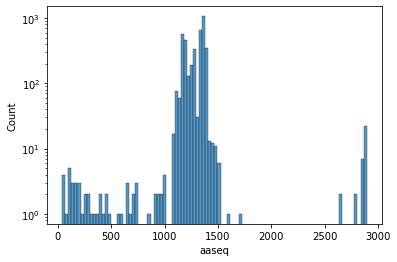

In [31]:
ax = sns.histplot(pdf.aaseq.str.len(), bins=100)
ax.set_yscale('log')

In [30]:
#filtered
pdf = pdf[(pdf.aaseq.str.len() > 1050) & (pdf.aaseq.str.len() < 1550)]

In [31]:
len(pdf.iloc[0, ].aaseq)

1342

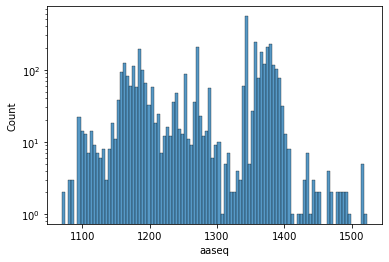

In [32]:
ax = sns.histplot(pdf.aaseq.str.len(), bins=100)
ax.set_yscale('log')

In [33]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import Bio.SeqIO as SeqIO
from Bio.Align.Applications import ClustalOmegaCommandline

in_file = "unaligned.fasta"
out_file = "aligned_filter.fasta"

# Write my sequences to a fasta file
records = (SeqRecord(Seq(seq), id=str(index), name="Test", description="Test") for index,seq in enumerate(pdf.aaseq))
with open(in_file, 'w') as handle:
    SeqIO.write(records, handle, "fasta")

clustalomega_cline = ClustalOmegaCommandline(infile=in_file, outfile=out_file, verbose=True, auto=True, force=True)
clustalomega_cline()

('Using 32 threads\nRead 3965 sequences (type: Protein) from unaligned.fasta\nSetting options automatically based on input sequence characteristics (might overwrite some of your options).\nUsing 142 seeds (chosen with constant stride from length sorted seqs) for mBed (from a total of 3965 sequences)\nCalculating pairwise ktuple-distances...\nKtuple-distance calculation progress: 0 % (0 out of 553019)\nKtuple-distance calculation progress: 15 % (83686 out of 553019)\nKtuple-distance calculation progress: 16 % (89828 out of 553019)\nKtuple-distance calculation progress: 17 % (94972 out of 553019)\nKtuple-distance calculation progress: 19 % (110371 out of 553019)\nKtuple-distance calculation progress: 20 % (111019 out of 553019)\nKtuple-distance calculation progress: 26 % (145383 out of 553019)\nKtuple-distance calculation progress: 27 % (153572 out of 553019)\nKtuple-distance calculation progress: 28 % (156030 out of 553019)\nKtuple-distance calculation progress: 29 % (163232 out of 5530

In [25]:
print(clustalomega_cline)

clustalo -i unaligned.fasta -o aligned.fasta --iterations 5 --auto -v --force


In [19]:
print('Using 32 threads\nRead 4055 sequences (type: Protein) from unaligned.fasta\nSetting options automatically based on input sequence characteristics (might overwrite some of your options).\nAuto settings: Disabling iterations.\nUsing 143 seeds (chosen with constant stride from length sorted seqs) for mBed (from a total of 4055 sequences)\nCalculating pairwise ktuple-distances...\nKtuple-distance calculation progress: 0 % (0 out of 569712)\nKtuple-distance calculation progress: 14 % (83618 out of 569712)\nKtuple-distance calculation progress: 15 % (86862 out of 569712)\nKtuple-distance calculation progress: 16 % (91737 out of 569712)\nKtuple-distance calculation progress: 17 % (98427 out of 569712)\nKtuple-distance calculation progress: 18 % (105988 out of 569712)\nKtuple-distance calculation progress: 19 % (108941 out of 569712)\nKtuple-distance calculation progress: 20 % (114782 out of 569712)\nKtuple-distance calculation progress: 28 % (162236 out of 569712)\nKtuple-distance calculation progress: 29 % (166220 out of 569712)\nKtuple-distance calculation progress: 30 % (172056 out of 569712)\nKtuple-distance calculation progress: 31 % (178083 out of 569712)\nKtuple-distance calculation progress: 32 % (185404 out of 569712)\nKtuple-distance calculation progress: 33 % (192576 out of 569712)\nKtuple-distance calculation progress: 34 % (198737 out of 569712)\nKtuple-distance calculation progress: 35 % (202800 out of 569712)\nKtuple-distance calculation progress: 36 % (205270 out of 569712)\nKtuple-distance calculation progress: 37 % (211179 out of 569712)\nKtuple-distance calculation progress: 38 % (216625 out of 569712)\nKtuple-distance calculation progress: 39 % (222956 out of 569712)\nKtuple-distance calculation progress: 40 % (229248 out of 569712)\nKtuple-distance calculation progress: 42 % (241320 out of 569712)\nKtuple-distance calculation progress: 43 % (247902 out of 569712)\nKtuple-distance calculation progress: 44 % (252712 out of 569712)\nKtuple-distance calculation progress: 45 % (261325 out of 569712)\nKtuple-distance calculation progress: 46 % (265998 out of 569712)\nKtuple-distance calculation progress: 47 % (270669 out of 569712)\nKtuple-distance calculation progress: 54 % (308334 out of 569712)\nKtuple-distance calculation progress: 55 % (315986 out of 569712)\nKtuple-distance calculation progress: 56 % (319351 out of 569712)\nKtuple-distance calculation progress: 57 % (327677 out of 569712)\nKtuple-distance calculation progress: 58 % (331327 out of 569712)\nKtuple-distance calculation progress: 59 % (339150 out of 569712)\nKtuple-distance calculation progress: 60 % (345038 out of 569712)\nKtuple-distance calculation progress: 61 % (349513 out of 569712)\nKtuple-distance calculation progress: 64 % (364823 out of 569712)\nKtuple-distance calculation progress: 66 % (378170 out of 569712)\nKtuple-distance calculation progress: 67 % (381746 out of 569712)\nKtuple-distance calculation progress: 68 % (391677 out of 569712)\nKtuple-distance calculation progress: 69 % (396824 out of 569712)\nKtuple-distance calculation progress: 70 % (400235 out of 569712)\nKtuple-distance calculation progress: 71 % (406471 out of 569712)\nKtuple-distance calculation progress: 72 % (410633 out of 569712)\nKtuple-distance calculation progress: 73 % (416390 out of 569712)\nKtuple-distance calculation progress: 74 % (423630 out of 569712)\nKtuple-distance calculation progress: 75 % (431530 out of 569712)\nKtuple-distance calculation progress: 76 % (434183 out of 569712)\nKtuple-distance calculation progress: 77 % (443177 out of 569712)\nKtuple-distance calculation progress: 78 % (447346 out of 569712)\nKtuple-distance calculation progress: 79 % (452692 out of 569712)\nKtuple-distance calculation progress: 82 % (472675 out of 569712)\nKtuple-distance calculation progress: 83 % (473370 out of 569712)\nKtuple-distance calculation progress: 84 % (479668 out of 569712)\nKtuple-distance calculation progress: 86 % (492866 out of 569712)\nKtuple-distance calculation progress: 87 % (497113 out of 569712)\nKtuple-distance calculation progress: 88 % (502788 out of 569712)\nKtuple-distance calculation progress: 89 % (510432 out of 569712)\nKtuple-distance calculation progress: 90 % (515451 out of 569712)\nKtuple-distance calculation progress: 91 % (521464 out of 569712)\nKtuple-distance calculation progress: 94 % (538250 out of 569712)\nKtuple-distance calculation progress: 96 % (550803 out of 569712)\nKtuple-distance calculation progress: 98 % (560970 out of 569712)\nKtuple-distance calculation progress done. CPU time: 1107.61u 2.05s 00:18:29.65 Elapsed: 00:00:51\nmBed created 73 cluster/s (with a minimum of 1 and a soft maximum of 100 sequences each)\nDistance calculation within sub-clusters: 0 % (0 out of 73)\nDistance calculation within sub-clusters: 1 % (1 out of 73)\nDistance calculation within sub-clusters: 2 % (2 out of 73)\nDistance calculation within sub-clusters: 4 % (3 out of 73)\nDistance calculation within sub-clusters: 5 % (4 out of 73)\nDistance calculation within sub-clusters: 6 % (5 out of 73)\nDistance calculation within sub-clusters: 8 % (6 out of 73)\nDistance calculation within sub-clusters: 9 % (7 out of 73)\nDistance calculation within sub-clusters: 10 % (8 out of 73)\nDistance calculation within sub-clusters: 12 % (9 out of 73)\nDistance calculation within sub-clusters: 13 % (10 out of 73)\nDistance calculation within sub-clusters: 15 % (11 out of 73)\nDistance calculation within sub-clusters: 16 % (12 out of 73)\nDistance calculation within sub-clusters: 17 % (13 out of 73)\nDistance calculation within sub-clusters: 19 % (14 out of 73)\nDistance calculation within sub-clusters: 20 % (15 out of 73)\nDistance calculation within sub-clusters: 21 % (16 out of 73)\nDistance calculation within sub-clusters: 23 % (17 out of 73)\nDistance calculation within sub-clusters: 24 % (18 out of 73)\nDistance calculation within sub-clusters: 26 % (19 out of 73)\nDistance calculation within sub-clusters: 27 % (20 out of 73)\nDistance calculation within sub-clusters: 28 % (21 out of 73)\nDistance calculation within sub-clusters: 30 % (22 out of 73)\nDistance calculation within sub-clusters: 31 % (23 out of 73)\nDistance calculation within sub-clusters: 32 % (24 out of 73)\nDistance calculation within sub-clusters: 34 % (25 out of 73)\nDistance calculation within sub-clusters: 35 % (26 out of 73)\nDistance calculation within sub-clusters: 36 % (27 out of 73)\nDistance calculation within sub-clusters: 38 % (28 out of 73)\nDistance calculation within sub-clusters: 39 % (29 out of 73)\nDistance calculation within sub-clusters: 41 % (30 out of 73)\nDistance calculation within sub-clusters: 42 % (31 out of 73)\nDistance calculation within sub-clusters: 43 % (32 out of 73)\nDistance calculation within sub-clusters: 45 % (33 out of 73)\nDistance calculation within sub-clusters: 46 % (34 out of 73)\nDistance calculation within sub-clusters: 47 % (35 out of 73)\nDistance calculation within sub-clusters: 49 % (36 out of 73)\nDistance calculation within sub-clusters: 50 % (37 out of 73)\nDistance calculation within sub-clusters: 52 % (38 out of 73)\nDistance calculation within sub-clusters: 53 % (39 out of 73)\nDistance calculation within sub-clusters: 54 % (40 out of 73)\nDistance calculation within sub-clusters: 56 % (41 out of 73)\nDistance calculation within sub-clusters: 57 % (42 out of 73)\nDistance calculation within sub-clusters: 58 % (43 out of 73)\nDistance calculation within sub-clusters: 60 % (44 out of 73)\nDistance calculation within sub-clusters: 61 % (45 out of 73)\nDistance calculation within sub-clusters: 63 % (46 out of 73)\nDistance calculation within sub-clusters: 64 % (47 out of 73)\nDistance calculation within sub-clusters: 65 % (48 out of 73)\nDistance calculation within sub-clusters: 67 % (49 out of 73)\nDistance calculation within sub-clusters: 68 % (50 out of 73)\nDistance calculation within sub-clusters: 69 % (51 out of 73)\nDistance calculation within sub-clusters: 71 % (52 out of 73)\nDistance calculation within sub-clusters: 72 % (53 out of 73)\nDistance calculation within sub-clusters: 73 % (54 out of 73)\nDistance calculation within sub-clusters: 75 % (55 out of 73)\nDistance calculation within sub-clusters: 76 % (56 out of 73)\nDistance calculation within sub-clusters: 78 % (57 out of 73)\nDistance calculation within sub-clusters: 79 % (58 out of 73)\nDistance calculation within sub-clusters: 80 % (59 out of 73)\nDistance calculation within sub-clusters: 82 % (60 out of 73)\nDistance calculation within sub-clusters: 83 % (61 out of 73)\nDistance calculation within sub-clusters: 84 % (62 out of 73)\nDistance calculation within sub-clusters: 86 % (63 out of 73)\nDistance calculation within sub-clusters: 87 % (64 out of 73)\nDistance calculation within sub-clusters: 89 % (65 out of 73)\nDistance calculation within sub-clusters: 90 % (66 out of 73)\nDistance calculation within sub-clusters: 91 % (67 out of 73)\nDistance calculation within sub-clusters: 93 % (68 out of 73)\nDistance calculation within sub-clusters: 94 % (69 out of 73)\nDistance calculation within sub-clusters: 95 % (70 out of 73)\nDistance calculation within sub-clusters: 97 % (71 out of 73)\nDistance calculation within sub-clusters: 98 % (72 out of 73)\nDistance calculation within sub-clusters done. CPU time: 350.18u 1.05s 00:05:51.23 Elapsed: 00:00:24\nGuide-tree computation (mBed) done.\nProgressive alignment progress: 0 % (1 out of 4054)\nProgressive alignment progress: 1 % (41 out of 4054)\nProgressive alignment progress: 2 % (82 out of 4054)\nProgressive alignment progress: 3 % (122 out of 4054)\nProgressive alignment progress: 4 % (163 out of 4054)\nProgressive alignment progress: 5 % (203 out of 4054)\nProgressive alignment progress: 6 % (244 out of 4054)\nProgressive alignment progress: 7 % (284 out of 4054)\nProgressive alignment progress: 8 % (325 out of 4054)\nProgressive alignment progress: 9 % (365 out of 4054)\nProgressive alignment progress: 10 % (406 out of 4054)\nProgressive alignment progress: 11 % (446 out of 4054)\nProgressive alignment progress: 12 % (487 out of 4054)\nProgressive alignment progress: 13 % (528 out of 4054)\nProgressive alignment progress: 14 % (568 out of 4054)\nProgressive alignment progress: 15 % (609 out of 4054)\nProgressive alignment progress: 16 % (649 out of 4054)\nProgressive alignment progress: 17 % (690 out of 4054)\nProgressive alignment progress: 18 % (730 out of 4054)\nProgressive alignment progress: 19 % (771 out of 4054)\nProgressive alignment progress: 20 % (811 out of 4054)\nProgressive alignment progress: 21 % (852 out of 4054)\nProgressive alignment progress: 22 % (892 out of 4054)\nProgressive alignment progress: 23 % (933 out of 4054)\nProgressive alignment progress: 24 % (973 out of 4054)\nProgressive alignment progress: 25 % (1014 out of 4054)\nProgressive alignment progress: 26 % (1055 out of 4054)\nProgressive alignment progress: 27 % (1095 out of 4054)\nProgressive alignment progress: 28 % (1136 out of 4054)\nProgressive alignment progress: 29 % (1176 out of 4054)\nProgressive alignment progress: 30 % (1217 out of 4054)\nProgressive alignment progress: 31 % (1257 out of 4054)\nProgressive alignment progress: 32 % (1298 out of 4054)\nProgressive alignment progress: 33 % (1338 out of 4054)\nProgressive alignment progress: 34 % (1379 out of 4054)\nProgressive alignment progress: 35 % (1419 out of 4054)\nProgressive alignment progress: 36 % (1460 out of 4054)\nProgressive alignment progress: 37 % (1500 out of 4054)\nProgressive alignment progress: 38 % (1541 out of 4054)\nProgressive alignment progress: 39 % (1582 out of 4054)\nProgressive alignment progress: 40 % (1622 out of 4054)\nProgressive alignment progress: 41 % (1663 out of 4054)\nProgressive alignment progress: 42 % (1703 out of 4054)\nProgressive alignment progress: 43 % (1744 out of 4054)\nProgressive alignment progress: 44 % (1784 out of 4054)\nProgressive alignment progress: 45 % (1825 out of 4054)\nProgressive alignment progress: 46 % (1865 out of 4054)\nProgressive alignment progress: 47 % (1906 out of 4054)\nProgressive alignment progress: 48 % (1946 out of 4054)\nProgressive alignment progress: 49 % (1987 out of 4054)\nProgressive alignment progress: 50 % (2027 out of 4054)\nProgressive alignment progress: 51 % (2068 out of 4054)\nProgressive alignment progress: 52 % (2109 out of 4054)\nProgressive alignment progress: 53 % (2149 out of 4054)\nProgressive alignment progress: 54 % (2190 out of 4054)\nProgressive alignment progress: 55 % (2230 out of 4054)\nProgressive alignment progress: 56 % (2271 out of 4054)\nProgressive alignment progress: 57 % (2311 out of 4054)\nProgressive alignment progress: 58 % (2352 out of 4054)\nProgressive alignment progress: 59 % (2392 out of 4054)\nProgressive alignment progress: 60 % (2433 out of 4054)\nProgressive alignment progress: 61 % (2473 out of 4054)\nProgressive alignment progress: 62 % (2514 out of 4054)\nProgressive alignment progress: 63 % (2555 out of 4054)\nProgressive alignment progress: 64 % (2595 out of 4054)\nProgressive alignment progress: 65 % (2636 out of 4054)\nProgressive alignment progress: 66 % (2676 out of 4054)\nProgressive alignment progress: 67 % (2717 out of 4054)\nProgressive alignment progress: 68 % (2757 out of 4054)\nProgressive alignment progress: 69 % (2798 out of 4054)\nProgressive alignment progress: 70 % (2838 out of 4054)\nProgressive alignment progress: 71 % (2879 out of 4054)\nProgressive alignment progress: 72 % (2919 out of 4054)\nProgressive alignment progress: 73 % (2960 out of 4054)\nProgressive alignment progress: 74 % (3000 out of 4054)\nProgressive alignment progress: 75 % (3041 out of 4054)\nProgressive alignment progress: 76 % (3082 out of 4054)\nProgressive alignment progress: 77 % (3122 out of 4054)\nProgressive alignment progress: 78 % (3163 out of 4054)\nProgressive alignment progress: 79 % (3203 out of 4054)\nProgressive alignment progress: 80 % (3244 out of 4054)\nProgressive alignment progress: 81 % (3284 out of 4054)\nProgressive alignment progress: 82 % (3325 out of 4054)\nProgressive alignment progress: 83 % (3365 out of 4054)\nProgressive alignment progress: 84 % (3406 out of 4054)\nProgressive alignment progress: 85 % (3446 out of 4054)\nProgressive alignment progress: 86 % (3487 out of 4054)\nProgressive alignment progress: 87 % (3527 out of 4054)\nProgressive alignment progress: 88 % (3568 out of 4054)\nProgressive alignment progress: 89 % (3609 out of 4054)\nProgressive alignment progress: 90 % (3649 out of 4054)\nProgressive alignment progress: 91 % (3690 out of 4054)\nProgressive alignment progress: 92 % (3730 out of 4054)\nProgressive alignment progress: 93 % (3771 out of 4054)\nProgressive alignment progress: 94 % (3811 out of 4054)\nProgressive alignment progress: 95 % (3852 out of 4054)\nProgressive alignment progress: 96 % (3892 out of 4054)\nProgressive alignment progress: 97 % (3933 out of 4054)\nProgressive alignment progress: 98 % (3973 out of 4054)\nProgressive alignment progress: 99 % (4014 out of 4054)\nProgressive alignment progress: 100 % (4054 out of 4054)\nProgressive alignment progress done. CPU time: 46559.69u 464.30s 13:03:43.99 Elapsed: 01:14:13\nAlignment written to aligned.fasta\n',)

Using 32 threads
Read 4055 sequences (type: Protein) from unaligned.fasta
Setting options automatically based on input sequence characteristics (might overwrite some of your options).
Auto settings: Disabling iterations.
Using 143 seeds (chosen with constant stride from length sorted seqs) for mBed (from a total of 4055 sequences)
Calculating pairwise ktuple-distances...
Ktuple-distance calculation progress: 0 % (0 out of 569712)
Ktuple-distance calculation progress: 14 % (83618 out of 569712)
Ktuple-distance calculation progress: 15 % (86862 out of 569712)
Ktuple-distance calculation progress: 16 % (91737 out of 569712)
Ktuple-distance calculation progress: 17 % (98427 out of 569712)
Ktuple-distance calculation progress: 18 % (105988 out of 569712)
Ktuple-distance calculation progress: 19 % (108941 out of 569712)
Ktuple-distance calculation progress: 20 % (114782 out of 569712)
Ktuple-distance calculation progress: 28 % (162236 out of 569712)
Ktuple-distance calculation progress: 29 %

In [2]:
divergence = pd.read_csv('js_divergence.txt', sep='\t', header=2, names=['number', 'aa', 'conservation'])
divergence['pos'] = divergence.index + 1

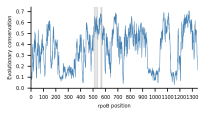

In [3]:
dat = divergence
#dat['rif'] = False
#dat.loc[((dat.pos >= 510) & (dat.pos <= 537)) | ((dat.pos >= 563) & (dat.pos <= 572)), 'rif'] = True

plt.figure(figsize = (3, 1.5))

ax = sns.lineplot(x='pos', y='conservation', data=dat, color='steelblue', markers=True, linewidth=.5)
sns.despine()

#ax.xaxis.grid(True)

ax.set_xlim(0, max(dat.pos))
ax.set_xlabel('$\it{rpoB}$ position')
ax.set_ylabel('Evolutionary conservation')
ax.axvspan(xmin=510, xmax=537, alpha=.2, color='gray')
ax.axvspan(xmin=563, xmax=572, alpha=.2, color='gray')

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))

plt.savefig('svg/c.svg', format="svg")

#for item in ax.get_xticklabels():
 #   item.set_rotation(45)

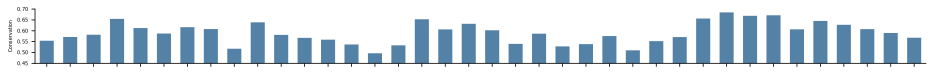

In [4]:
dat = divergence.copy()
dat = dat.loc[((dat.pos >= 510) & (dat.pos <= 537)) | ((dat.pos >= 563) & (dat.pos <= 572)), :]
dat.loc[:, 'pos'] = dat.pos.apply(str)

plt.figure(figsize = (16, 1))

ax = sns.barplot(x='pos', y='conservation', data=dat, color='steelblue', dodge=True)
sns.despine()

#ax.set_xlim(0, max(dat.pos))
#ax.set_xlim(.45, .7)
ax.set_ylim(.45, .7)
ax.set_xlabel('')
ax.set(xticklabels=[])
ax.set_ylabel('Conservation')
#ax.axvspan(xmin=510, xmax=537, alpha=.2, color='gray')
#ax.axvspan(xmin=563, xmax=572, alpha=.2, color='gray')
#ax.xaxis.grid(True)

#import matplotlib.ticker as ticker
#ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

#for item in ax.get_xticklabels():
    #item.set_rotation(90)
    
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .6)

In [3]:
dfb = pd.read_excel('codons_ravel.xlsx', index_col=0)
dfb = dfb[(dfb.num >= 10) & (dfb.num <= 72)]

dfr = pd.read_excel('../2020-06-30_MAGE-Seq/codons_ravel.xlsx', index_col=0)
#dfr = dfr[(dfr.num >= 10) & (dfr.num <= 72)]

dfs = pd.read_excel('../2021-06-16_MAGEseq_SHX/codons_ravel.xlsx', index_col=0)
dfs = dfs[(dfs.num >= 10) & (dfs.num <= 72)]

df = dfs.merge(dfb, on='Label')
df = df.merge(dfr, on='Label')

df = df[['num', 'fc_fit', 'fc_rif', 'fc_bcmlow', 'fc_bcmhigh', 'fc_fulow', 'fc_fuhigh']]
df['num'] = df.num + 500

In [4]:
#df['mean'] = df[['fc_fit', 'fc_fit_x', 'fc_fit_y', 'fc_fitlong']].mean(axis=1) #mean makes no difference

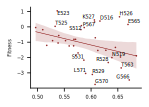

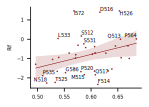

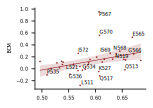

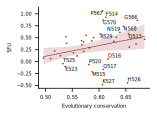

In [27]:
dat = pd.concat([divergence.iloc[510:540,:], divergence.iloc[560:580,:]])
label = ['Fitness', 'Rif', 'BCM', '5FU']
for i, cond in enumerate(['fc_fit', 'fc_rif', 'fc_bcmhigh', 'fc_fulow']):
    
    x = df[['num', cond]].copy()
    x[cond] = x[cond].replace([-np.inf], x[cond][~np.isinf(x[cond])].min())
    x[cond] = x[cond].replace([np.inf], x[cond][~np.isinf(x[cond])].max())
    
    x = x.groupby('num').mean().reset_index().melt(id_vars='num').merge(dat, left_on='num', right_on='pos')
    x['label'] = x.aa + x.num.apply(str)
    
    plt.figure(figsize = (2, 1.5))
    ax = sns.regplot(x='conservation', y='value', data=x, color='maroon', line_kws={'linewidth':.5}, scatter_kws={'s':.5})
    sns.despine()
    
    if i == 3:
        ax.set_xlabel('Evolutionary conservation')
    else:
        ax.set_xlabel('')
    #ax.set_ylabel(cond)
    
    ax.set_ylabel(label[i])

    selected = x
    selected = selected[(selected.value < selected.value.quantile(.2)) | (selected.value > selected.value.quantile(.8))]
    texts=[]
    for index, row in selected[['label', 'conservation', 'value']].iterrows():
        texts.append(plt.text(row['conservation'], row['value'], row['label']))
    adjust_text(texts, only_move={'points':'y', 'texts':'y'})
    
    plt.savefig('svg/f'+str(i)+'.svg', format="svg")
    plt.show()

In [ ]:
#plot x axis fitness vs y axis percentage of mutations

In [4]:
dfb = pd.read_excel('codons_ravel.xlsx', index_col=0)
dfb = dfb[(dfb.num >= 10) & (dfb.num <= 72)]

dfr = pd.read_excel('../2020-06-30_MAGE-Seq/codons_ravel.xlsx', index_col=0)
#dfr = dfr[(dfr.num >= 10) & (dfr.num <= 72)]

dfs = pd.read_excel('../2021-06-16_MAGEseq_SHX/codons_ravel.xlsx', index_col=0)
dfs = dfs[(dfs.num >= 10) & (dfs.num <= 72)]

df = dfs.merge(dfb, on='Label')
df = df.merge(dfr, on='Label')

df['num'] = df.num + 500

o = pd.read_csv('kegg_orthos.csv')
pdf = o[(o.domain == 'Prokaryotes') & (o.phylum == 'Bacteria')].copy()

df['subs'] = 0
classes = [[] for i in range(len(df))]
subs = [[] for i in range(len(pdf))]

In [5]:
#get percentages of each phylum
x = pd.DataFrame.from_dict(Counter(pdf['class']), orient='index').reset_index()
x['percent'] = x[0] * 100/ x[0].sum()

In [8]:
find = ['Gammaproteobacteria - Enterobacteria', 'Gammaproteobacteria - Others', 'Firmicutes - Bacilli', 'Firmicutes - Clostridia', 'Firmicutes - Others']
replace = ['Gammaproteobacteria', 'Gammaproteobacteria', 'Firmicutes', 'Firmicutes', 'Firmicutes',]
x = x.replace(find, replace)

find = ['Gammaproteobacteria', 'Alphaproteobacteria', 'Betaproteobacteria', 'Epsilonproteobacteria', 'Deltaproteobacteria']
replace = ['Proteobacteria', 'Proteobacteria', 'Proteobacteria', 'Proteobacteria', 'Proteobacteria',]
x = x.replace(find, replace)

x = x.groupby('index').sum().reset_index()

In [7]:
x.sort_values('percent', ascending=False)

,index,0,percent
26,Proteobacteria,2119,52.256473
17,Firmicutes,666,16.424168
1,Actinobacteria,498,12.281134
5,Bacteroidetes,285,7.028360
28,Tenericutes,138,3.403206
8,Chlamydiae,76,1.874229
11,Cyanobacteria,68,1.676942
27,Spirochaetes,52,1.282367
25,Planctomycetes,42,1.035758
10,Chloroflexi,13,0.320592


In [8]:
Counter(pdf['family'])

Counter({'Escherichia': 60,
         'Salmonella': 46,
         'Shigella': 10,
         'Enterobacter': 24,
         'Cronobacter': 8,
         'Klebsiella': 30,
         'Citrobacter': 16,
         'Blochmannia': 6,
         'Hamiltonella': 1,
         'unclassified mealybug symbionts': 1,
         'Riesia': 2,
         'Moranella': 2,
         'Shimwellia': 1,
         'Raoultella': 6,
         'Cedecea': 4,
         'Pluralibacter': 2,
         'Kosakonia': 4,
         'Kluyvera': 3,
         'Ishikawaella': 1,
         'Leclercia': 6,
         'Lelliottia': 1,
         'Buttiauxella': 1,
         'Tachikawaea': 1,
         'Doolittlea': 1,
         'Hoaglandella': 1,
         'Gullanella': 1,
         'Mikella': 1,
         'Symbiopectobacterium': 1,
         'Metakosakonia': 1,
         'Atlantibacter': 5,
         'Yokenella': 1,
         'Scandinavium': 1,
         'Phytobacter': 2,
         'Izhakiella': 1,
         'Profftia': 1,
         'Schneideria': 1,
         'unclassif

In [ ]:
#run this

In [10]:
from Bio import AlignIO

alignments = AlignIO.parse("aligned.fasta", "fasta")
#alignments = AlignIO.parse("aligned_filter.fasta", "fasta")

for alignment in alignments:
    print(len(alignment))

#use divergence for indexing
divergence = pd.read_csv('js_divergence.txt', sep='\t', header=2, names=['number', 'aa', 'conservation'])
divergence['pos'] = divergence.index + 1

dat = divergence
dat = dat.loc[((dat.pos >= 510) & (dat.pos <= 537)) | ((dat.pos >= 563) & (dat.pos <= 572)), :]

for n, p in zip(dat.number, dat.pos):
    for c in alignment[0, n]: #loop through MG1655 seq
        #print(p, c)
        aligned = []
        for j, d in enumerate(alignment[:, n]): #loop through aligned character
            #if (d != c): #not the same as WT
            if (d != c) and (d != '-'): #not the same as WT and not gap
                #find in mageseq table and add 
                df.loc[(df.num == p) & (df.AA == d), 'subs'] += 1
                ix = df.loc[(df.num == p) & (df.AA == d),:].index[0]
                
                #find in class table and add
                classes[ix].append(pdf.iloc[j, :]['class'])
                
                #find in pdf subs table and add sub
                subs[j].append(str(p)+d)
                
                aligned.append(d) #for barplots below
        
        #barplots
        #new_vals = Counter(aligned).most_common()
        #new_vals = new_vals[::-1] #this sorts the list in ascending order
        #new_vals = pd.DataFrame(new_vals)
        #sns.barplot(x=0, y=1, data=new_vals[new_vals[0] != c])
        #plt.show()

#add subs to pdf
pdf.loc[:, 'subs_list'] = subs
pdf.loc[:, 'subs_list_len'] = pdf.subs_list.str.len()

4055


/home/kevin/miniconda3/envs/py3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


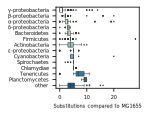

In [11]:
p = pdf

#get number in each class to allow for filtering
class_counts = pd.DataFrame.from_dict(Counter(pdf['class']), orient='index').reset_index()

#filter by class size
#p = p[p['class'].isin(class_counts[class_counts[0] > 40]['index'])]

p = p[['class', 'subs_list_len']]

#combine classes
find = ['Gammaproteobacteria - Enterobacteria', 'Gammaproteobacteria - Others', 'Firmicutes - Bacilli', 'Firmicutes - Clostridia', 'Firmicutes - Others']
replace = ['Gammaproteobacteria', 'Gammaproteobacteria', 'Firmicutes', 'Firmicutes', 'Firmicutes',]
p = p.replace(find, replace)

#combine others
find = list(class_counts[class_counts[0] < 40]['index'])
replace = ['other'] * len(find)
p = p.replace(find, replace)

#change labels
find = ['Gammaproteobacteria', 'Betaproteobacteria', 'Alphaproteobacteria', 'Deltaproteobacteria', 'Epsilonproteobacteria']
replace = ['γ-proteobacteria', 'β-proteobacteria', 'α-proteobacteria', 'δ-proteobacteria', 'ε-proteobacteria']
p = p.replace(find, replace)

#sort by order
o = list(p.groupby('class').mean().reset_index().sort_values('subs_list_len')['class'])
o.append(o.pop(o.index('other')))

plt.figure(figsize = (1.5, 1.5))
ax = sns.boxplot(y='class', x='subs_list_len', data=p, order=o, palette='GnBu', linewidth=.5, fliersize=.5)
ax.set_xlabel('Substitutions compared to MG1655')
ax.set_ylabel('')

plt.savefig('d.svg', format="svg")

#for item in ax.get_xticklabels():
    #item.set_rotation(90)

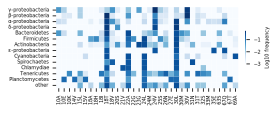

In [12]:
#get unique classes that have mutations
unique_classes = set([item for sublist in classes for item in sublist])

#produce and populate dataframe for heatmap
hm = pd.DataFrame(0, index=df.Label, columns=unique_classes)

for i, c in enumerate(classes):  
    for citer in Counter(c).most_common():
        hm.loc[hm.index[i], citer[0]] += citer[1]

comb = ['Gammaproteobacteria - Others', 'Gammaproteobacteria - Enterobacteria']
hm['Gammaproteobacteria'] = hm[comb].sum(axis=1)
hm = hm.drop(comb, axis=1)

comb = ['Firmicutes - Bacilli', 'Firmicutes - Clostridia', 'Firmicutes - Others']
hm['Firmicutes'] = hm[comb].sum(axis=1)
hm = hm.drop(comb, axis=1)

comb = list(hm.loc[:, hm.sum(axis=0) < 40].columns)
hm['other'] = hm[comb].sum(axis=1)
hm = hm.drop(comb, axis=1)

find = ['Gammaproteobacteria', 'Betaproteobacteria', 'Alphaproteobacteria', 'Deltaproteobacteria', 'Epsilonproteobacteria']
replace = ['γ-proteobacteria', 'β-proteobacteria', 'α-proteobacteria', 'δ-proteobacteria', 'ε-proteobacteria']
hm = hm.rename(dict(zip(find, replace)), axis=1)

plt.figure(figsize = (4, 1.5))

hm = hm.loc[hm.sum(axis=1) > 40, :] #filter mutations
#hm = hm.loc[:, hm.sum(axis=0) > 40] #filter number of strains in each class

#sns.heatmap(np.log10(h+.1), vmin=0)

o = list(p.groupby('class').mean().reset_index().sort_values('subs_list_len')['class'])
o.append(o.pop(o.index('other')))

#hm = hm.apply(stats.zscore, axis=0) #zscore by column
hm = hm.divide(hm.sum(axis=0),axis=1) #ratio
ax = sns.heatmap(np.log10(hm[o].T + .001), cbar_kws={'label': 'Log10 frequency', 'shrink':.4, 'orientation':'vertical', 'pad':.03}, cmap='Blues', xticklabels=1)
ax.set_xlabel('')

plt.savefig('svg/2b.svg', format="svg")

In [13]:
#get unique classes that have mutations
unique_classes = set([item for sublist in classes for item in sublist])

#produce and populate dataframe for heatmap
hm = pd.DataFrame(0, index=df.Label, columns=unique_classes)

for i, c in enumerate(classes):  
    for citer in Counter(c).most_common():
        hm.loc[hm.index[i], citer[0]] += citer[1]

comb = ['Gammaproteobacteria - Others', 'Gammaproteobacteria - Enterobacteria']
hm['Gammaproteobacteria'] = hm[comb].sum(axis=1)
hm = hm.drop(comb, axis=1)

comb = ['Firmicutes - Bacilli', 'Firmicutes - Clostridia', 'Firmicutes - Others']
hm['Firmicutes'] = hm[comb].sum(axis=1)
hm = hm.drop(comb, axis=1)

In [48]:
x = hm.sum(axis=1).reset_index()

x['yaxis'] = x.Label.str[0:2]
x['xaxis'] = x.Label.str[2:]

In [49]:
x = x.pivot(index='yaxis', columns='xaxis', values=0) 
x = x / x.sum().sum()

In [50]:
table = { 
            #'_':'stop',
            'H':'basic', 'R':'basic', 'K':'basic',
            'A':'aliphatic', 'G':'aliphatic', 'I':'aliphatic', 'L':'aliphatic', 'P':'aliphatic', 'V':'aliphatic',
            'F':'aromatic', 'W':'aromatic', 'Y':'aromatic',
            'D':'acidic', 'E':'acidic',
            'S':'hydroxylic', 'T':'hydroxylic',
            'C':'sulfur', 'M':'sulfur',
            'N':'amidic', 'Q':'amidic'}

def safe_ln(x, minval=0.0001):
    return np.log10(x.clip(minval))

In [81]:
#get wt positions
dfb = pd.read_excel('codons_ravel.xlsx', index_col=0)
dfb = dfb[(dfb.num >= 10) & (dfb.num <= 72)]

for index, row in dfb[['AA', 'num', 't01']].iterrows():
    if np.isnan(row['t01']):
        x.loc[str(row['num']), row['AA']] = row['t01']

In [97]:
x = x.drop('_', axis=1)

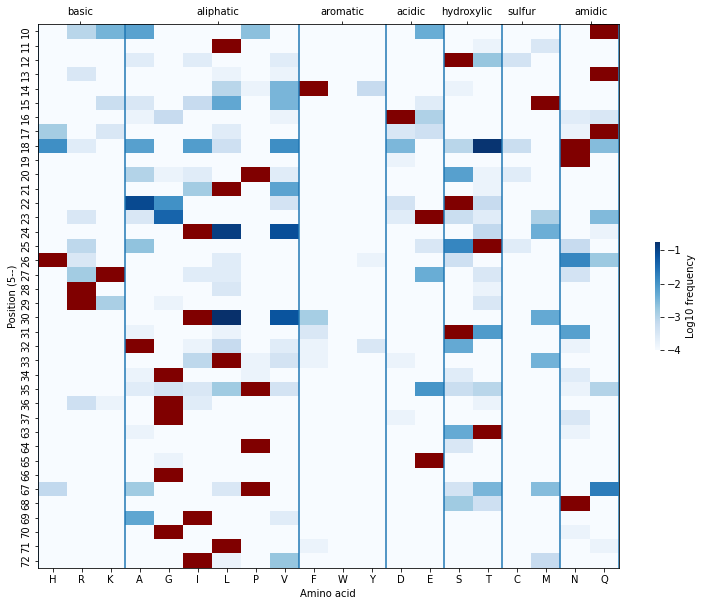

In [108]:
plt.figure(figsize = (13, 10))

ax = sns.heatmap(safe_ln(x[table]), cmap='Blues', cbar_kws={'label': 'Log10 frequency', 'shrink':0.2, 'orientation':'vertical'})

ax.set_ylabel('Position (5--)')
ax.set_xlabel('Amino acid')
ax.vlines([l - 1 for l in [1, 4, 10, 13, 15, 17, 19, 21]], *ax.get_ylim())

ax1 = ax.twiny()
#ax1.set_xlim([-1,63])
#ax1.set_xticks(range(0, 63, 1))
ax1.set_xlim([0, 21])
ax1.set_xticks([l for l in [1.5, 6.5, 11, 13.5, 15.5, 17.5, 20]])
#ax1.set_xticklabels(target[37:55])
ax1.set_xticklabels(['basic', 'aliphatic', 'aromatic', 'acidic', 'hydroxylic', 'sulfur', 'amidic'])

ax.set_facecolor("maroon")

In [23]:
#subs should have some

df.loc[df.Label == '26N', ['fc_fuhigh', 'p_fuhigh']]

,fc_fuhigh,p_fuhigh
347,-1.038607,0.013713


In [33]:
df

,Label,t01_x,t02_x,lb01_x,lb02_x,lb03_x,shx01,shx02,shx03,fit01,...,fc_rif,fc_fit,p_rif,p_fit,AA,num,type,Label2,stop_codon,subs
0,10A,0.000851,0.000739,0.000873,0.000976,0.000879,0.000930,0.001017,0.000732,0.000790,...,-1.804588,0.265009,0.000013,0.027861,A,510,aliphatic,10_aliphatic,False,78
1,10C,0.001285,0.000947,0.001471,0.001580,0.001258,0.001183,0.001077,0.001161,0.001334,...,-1.730103,0.445890,0.000007,0.006111,C,510,sulfur,10_sulfur,False,0
2,10D,0.000367,0.000379,0.000259,0.000319,0.000339,0.000225,0.000239,0.000222,0.000317,...,-2.798816,-1.689758,0.000224,0.000957,D,510,acidic,10_acidic,False,0
3,10E,0.001269,0.001122,0.000938,0.001047,0.000799,0.000592,0.000882,0.000621,0.000846,...,-1.942091,-0.805378,0.000172,0.001786,E,510,acidic,10_acidic,False,55
4,10F,0.000818,0.000868,0.000291,0.000195,0.000399,0.000507,0.000120,0.000116,0.000121,...,-0.974105,-3.484313,0.078531,0.000036,F,510,aromatic,10_aromatic,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,72T,0.003580,0.004964,0.004116,0.004570,0.003526,0.003228,0.003389,0.005644,0.006404,...,2.173439,1.229819,0.000017,0.000672,T,572,hydroxylic,72_hydroxylic,False,0
794,72V,0.003763,0.006311,0.005763,0.005691,0.004828,0.005650,0.006430,0.007680,0.008592,...,-0.149470,1.283242,0.114069,0.002771,V,572,aliphatic,72_aliphatic,False,24
795,72W,0.000918,0.000460,0.000173,0.000086,0.000054,0.000269,0.000174,0.000010,0.000067,...,0.575653,-4.502094,0.617328,0.000992,W,572,aromatic,72_aromatic,False,0
796,72Y,0.002799,0.001658,0.002990,0.003492,0.003038,0.003587,0.003345,0.002344,0.002779,...,3.195777,1.096206,0.000009,0.000472,Y,572,aromatic,72_aromatic,False,0


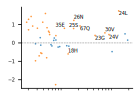

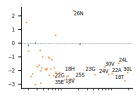

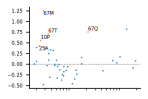

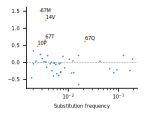

In [35]:
from adjustText import adjust_text

for j, cond in enumerate(['fit', 'rif', 'bcmhigh', 'fulow']):
    plt.figure(figsize = (2, 1.5))
    
    xdf = df.copy()
    xdf = xdf[xdf.subs > 20]
    xdf['subs'] = xdf.subs / sum(xdf.subs)
    #xdf['subs'] = xdf.subs / 4055 #number of seqs
    xdf['sig'] = xdf['p_'+cond] < .01
    
    ax = sns.scatterplot(y='fc_'+cond, x='subs', hue='sig', data=xdf, linewidth=0, alpha=.8, s=3)
    sns.despine()
    
    ax.set_xscale('log')
    #ax.set_ylim(10E0, 3E3)
    ax.axhline(0, linestyle='--', color='gray', linewidth=.5)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend().remove()
    
    if j == 3:
        ax.set_xlabel('Substitution frequency')
    else:
        ax.set_xticks([])
    
    #selected = df.sort_values('subs', ascending=False).head(30)
    #selected = xdf[((xdf.subs > .01) & xdf.sig) | (xdf.Label.isin(['26N', '67Q', '24L']))]
    if j > 1:
        selected = xdf[xdf.sig]
    else:
        selected = xdf[((xdf.subs > .01) & xdf.sig)]
    texts=[]
    for index, row in selected[['Label', 'fc_'+cond, 'subs']].iterrows():
        texts.append(plt.text(row['subs'], row['fc_'+cond], row['Label']))
        
    adjust_text(texts, only_move={'points':'y', 'texts':'y'})
    
    plt.savefig('svg/g'+str(j)+'.svg', format="svg")
    
    plt.show()

In [10]:
pdf

,meta,aaseq,id,name,kegg_id,T_id,species,class,domain,phylum,family,subs_list,subs_list_len
97,eco:b3987 K03043 DNA-directed RNA polymerase s...,MVYSYTEKKRIRKDFGKRPQVLDVPYLLSIQLDSFQKFIEQDPEGQ...,eco:b3987,rpoB; RNA polymerase subunit beta,eco,T00007,Escherichia coli K-12 MG1655,Gammaproteobacteria - Enterobacteria,Prokaryotes,Bacteria,Escherichia,[],0
98,ecj:JW3950 K03043 DNA-directed RNA polymerase ...,MVYSYTEKKRIRKDFGKRPQVLDVPYLLSIQLDSFQKFIEQDPEGQ...,ecj:JW3950,"rpoB; RNA polymerase, beta subunit",ecj,T00068,Escherichia coli K-12 W3110,Gammaproteobacteria - Enterobacteria,Prokaryotes,Bacteria,Escherichia,[],0
99,ecd:ECDH10B_4175 K03043 DNA-directed RNA polym...,MVYSYTEKKRIRKDFGKRPQVLDVPYLLSIQLDSFQKFIEQDPEGQ...,ecd:ECDH10B_4175,"rpoB; RNA polymerase, beta subunit",ecd,T00666,Escherichia coli K-12 DH10B,Gammaproteobacteria - Enterobacteria,Prokaryotes,Bacteria,Escherichia,[],0
100,ebw:BWG_3646 K03043 DNA-directed RNA polymeras...,MVYSYTEKKRIRKDFGKRPQVLDVPYLLSIQLDSFQKFIEQDPEGQ...,ebw:BWG_3646,"rpoB; RNA polymerase, beta subunit",ebw,T00913,Escherichia coli K-12 BW2952,Gammaproteobacteria - Enterobacteria,Prokaryotes,Bacteria,Escherichia,[],0
101,ecok:ECMDS42_3424 K03043 DNA-directed RNA poly...,MVYSYTEKKRIRKDFGKRPQVLDVPYLLSIQLDSFQKFIEQDPEGQ...,ecok:ECMDS42_3424,"rpoB; RNA polymerase, beta subunit",ecok,T02541,Escherichia coli K-12 MDS42,Gammaproteobacteria - Enterobacteria,Prokaryotes,Bacteria,Escherichia,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147,tmg:US01_C0001G0199 K03043 DNA-directed RNA po...,MPQKARRQNWGQKHQILPILDLIQLQSESYKDFLENGIAVALKEVN...,tmg:US01_C0001G0199,rpoB; DNA-directed RNA polymerase subunit beta,tmg,T04457,Candidate division TM6 bacterium GW2011_GWF2_2...,Bacteria incertae sedis,Prokaryotes,Bacteria,Bacteria candidate phyla,"[510R, 513A, 514I, 515L, 518T, 524V, 525D, 526...",15
4148,bgw:VE98_C0001G0335 K03043 DNA-directed RNA po...,MSKKALEPHILITENERYQDKWYADPKKVHPLPELNSLQRRSYDHF...,bgw:VE98_C0001G0335,rpoB; DNA-directed RNA polymerase subunit beta...,bgw,T03988,Candidate division Kazan bacterium GW2011_GWA1...,Bacteria incertae sedis,Prokaryotes,Bacteria,Bacteria candidate phyla,"[518T, 522A, 524L, 525E, 530L, 533M, 567Q, 572V]",8
4149,bbgw:UT28_C0001G0898 K03043 DNA-directed RNA p...,MSTQNRLQFSKPKFTVPLPNLIEVQTQSYDWFFKEGIRELLDEISP...,bbgw:UT28_C0001G0898,rpoB; DNA-directed RNA polymerase subunit beta...,bbgw,T03992,Berkelbacteria bacterium GW2011_GWE1_39_12,Bacteria incertae sedis,Prokaryotes,Bacteria,Bacteria candidate phyla,"[511M, 516N, 518T, 522A, 524L, 525E, 529C, 530...",10
4150,pwo:UX70_C0001G0567 K03043 DNA-directed RNA po...,MAKQLPTKVFSKHPGSFIEQPYLATLQAESWDWFVKKGLRELFDEI...,pwo:UX70_C0001G0567,rpoB; DNA-directed RNA polymerase subunit beta...,pwo,T04023,Candidatus Wolfebacteria bacterium GW2011_GWB1...,Bacteria incertae sedis,Prokaryotes,Bacteria,Bacteria candidate phyla,"[518V, 522A, 525E, 530L, 532L, 567Q, 568S, 572V]",8


In [25]:
pdf[['526N' in x for x in pdf.subs_list] and pdf['class'] == 'Tenericutes']

,meta,aaseq,id,name,kegg_id,T_id,species,class,domain,phylum,family,subs_list,subs_list_len
2894,mge:MG_341 K03043 DNA-directed RNA polymerase ...,MSQKSNFFQKRYSPTATRRYYGKIETNFIQPNLADIQIKSYQKFLD...,mge:MG_341,"rpoB; DNA-directed RNA polymerase, beta subunit",mge,T00002,Mycoplasma genitalium G37,Tenericutes,Prokaryotes,Bacteria,Mycoplasma,"[512T, 515L, 517H, 518Q, 524L, 525S, 526N, 533...",9
2895,mgu:CM5_02030 K03043 DNA-directed RNA polymera...,MSQKSNFFQKRYSPTATRRYYGKIETNFIQPNLADIQIKSYQKFLD...,mgu:CM5_02030,rpoB; DNA-directed RNA polymerase subunit beta,mgu,T02208,Mycoplasma genitalium M2288,Tenericutes,Prokaryotes,Bacteria,Mycoplasma,"[512T, 515L, 517H, 518Q, 524L, 525S, 526N, 533...",9
2896,mgc:CM9_02045 K03043 DNA-directed RNA polymera...,MSQKSNFFQKRYSPTATRRYYGKIETNFIQPNLADIQIKSYQKFLD...,mgc:CM9_02045,rpoB; DNA-directed RNA polymerase subunit beta,mgc,T02209,Mycoplasma genitalium M2321,Tenericutes,Prokaryotes,Bacteria,Mycoplasma,"[512T, 515L, 517H, 518Q, 524L, 525S, 526N, 533...",9
2897,mgq:CM3_02160 K03043 DNA-directed RNA polymera...,MSQKSNFFQKRYSPTATRRYYGKIETNFIQPNLADIQIKSYQKFLD...,mgq:CM3_02160,rpoB; DNA-directed RNA polymerase subunit beta,mgq,T02210,Mycoplasma genitalium M6282,Tenericutes,Prokaryotes,Bacteria,Mycoplasma,"[512T, 515L, 517H, 518Q, 524L, 525S, 526N, 533...",9
2898,mgx:CM1_02085 K03043 DNA-directed RNA polymera...,MSQKSNFFQKRYSPTATRRYYGKIETNFIQPNLADIQIKSYQKFLD...,mgx:CM1_02085,rpoB; DNA-directed RNA polymerase subunit beta,mgx,T02211,Mycoplasma genitalium M6320,Tenericutes,Prokaryotes,Bacteria,Mycoplasma,"[512T, 515L, 517H, 518Q, 524L, 525S, 526N, 533...",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3027,smoo:SMONO_v1c00440 K03043 DNA-directed RNA po...,MKYKIKKINALVERRDYAKVSGDLELPNLIELQTDTFEWFKQKGIN...,smoo:SMONO_v1c00440,rpoB; DNA-directed RNA polymerase subunit beta,smoo,T06543,Spiroplasma monobiae,Tenericutes,Prokaryotes,Bacteria,Spiroplasma,"[518T, 522A, 524L, 526N, 530L, 531T]",6
3028,salx:SALLE_v1c00470 K03043 DNA-directed RNA po...,MSYTVKKINQAVKRRDYTKVSGDLPLPNLIELQIDTFDWFQKKGID...,salx:SALLE_v1c00470,rpoB; DNA-directed RNA polymerase subunit beta,salx,T06597,Spiroplasma alleghenense,Tenericutes,Prokaryotes,Bacteria,Spiroplasma,"[518T, 522A, 524L, 526N, 530L, 531T]",6
3029,sgq:SGLAD_v1c00560 K03043 DNA-directed RNA pol...,MSYKNKQVNALVTRRDYTKVSGNLPLPNLIELQTETFDWFIKEGIK...,sgq:SGLAD_v1c00560,rpoB; DNA-directed RNA polymerase subunit beta,sgq,T06685,Spiroplasma gladiatoris,Tenericutes,Prokaryotes,Bacteria,Spiroplasma,"[518T, 522A, 524L, 526N, 530L, 531T]",6
3030,schi:SCHIN_v1c00630 K03043 DNA-directed RNA po...,MSYKIKNVNALVQRRDYTKVSGDLPLPNLIELQTDTFEWFLKEGIS...,schi:SCHIN_v1c00630,rpoB; DNA-directed RNA polymerase subunit beta,schi,T06905,Spiroplasma chinense,Tenericutes,Prokaryotes,Bacteria,Spiroplasma,"[518T, 524L, 526N, 530L, 531T]",5


In [23]:
#check mycoplasma
len(pdf[['526N' in x for x in pdf.subs_list] and pdf['family'] == 'Mycoplasma'])

63

In [24]:
len(pdf[pdf['family'] == 'Mycoplasma'])

63

In [29]:
#check helicobacter
len(pdf[['567Q' in x for x in pdf.subs_list] and pdf['family'] == 'Helicobacter'])

23

In [28]:
len(pdf[pdf['family'] == 'Helicobacter'])

23

In [30]:
#check campylobacter
len(pdf[['567Q' in x for x in pdf.subs_list] and pdf['family'] == 'Campylobacter'])

64

In [32]:
len(pdf[pdf['family'] == 'Campylobacter'])

64